## Agentic RAG :

- It is an advanced AI architecture where an LLM acts as an autonomous agent that manages the retrieval process through reasoning, rather than following a fixed "retrieve-then-generate" script


### Unlike traditional RAG, an agentic system built with LangGraph can: 

- Decide when to retrieve: It evaluates if it already knows the answer or needs to search external tools.

- Self-Correct: It can grade retrieved documents and, if they are irrelevant, rewrite the query and try again.

- Use Multiple Tools: It can route queries to different sources, such as a vector database for internal docs, a search engine for current news, or a specialized API for real-time data.

- Iterate: It can loop through several reasoning and retrieval steps until it has enough context to answer accurately. 

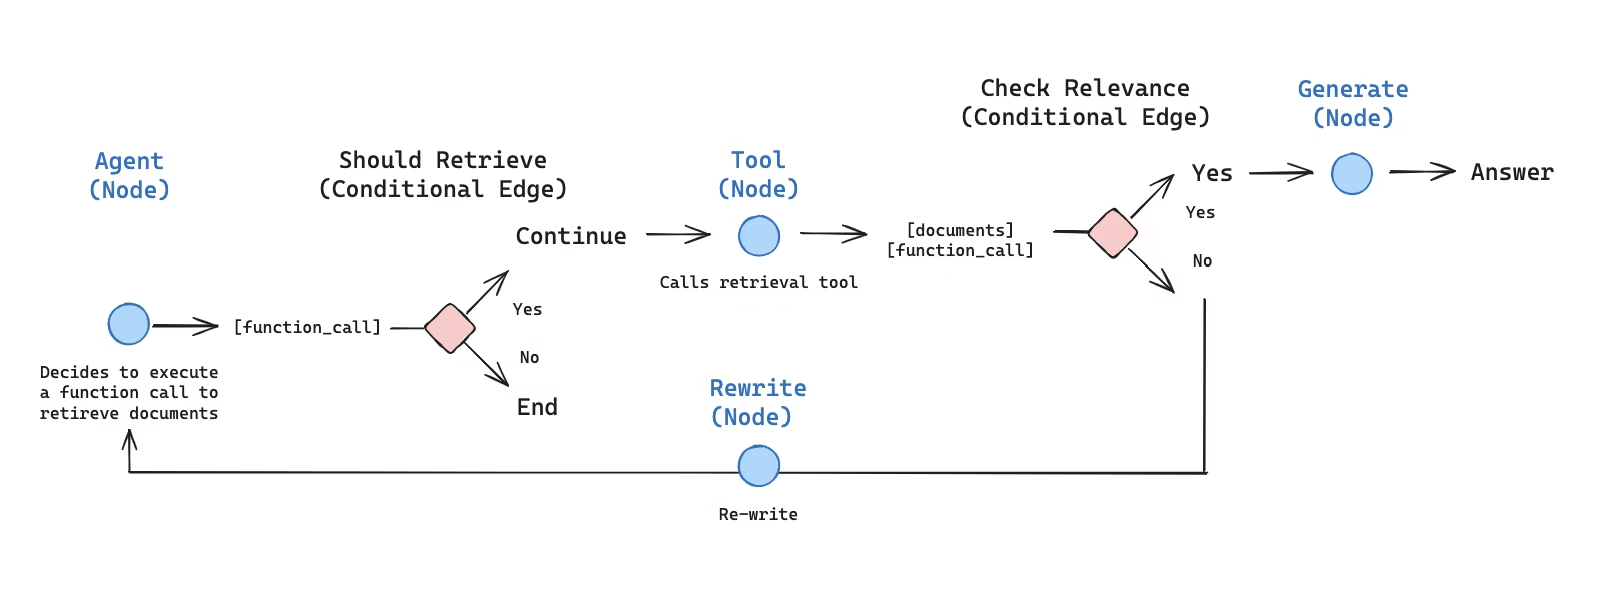

In [62]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["HF_TOKEN"]=os.getenv("HF_TOKEN")
api_key=os.getenv("LANGCHAIN_API_KEY")

In [63]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

##### LANGCHAIN DOCUMENTATION FOR RAG AGENTS IN ONE VECTOR STORE

In [64]:
langgraph_urls=[
    "https://docs.langchain.com/oss/python/langchain/rag",
    "https://docs.langchain.com/oss/python/langchain/sql-agent",
    "https://docs.langchain.com/oss/python/langchain/supervisor",
    "https://docs.langchain.com/oss/python/langchain/voice-agent"
]

docs=[WebBaseLoader(url).load() for url in langgraph_urls]



In [65]:
docs_list=[item for sublist in docs for item in sublist]

text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
embeddings=HuggingFaceEmbeddings(model="all-MiniLM-L6-v2")
docs_splits=text_splitter.split_documents(docs_list)

vectorstores=FAISS.from_documents(
    documents=docs_splits,
    embedding=embeddings
)

langgraph_retriever=vectorstores.as_retriever()

In [91]:
langgraph_retriever.invoke("what is sql agent")[:1]

[Document(id='20009dc5-b46f-4d43-b18f-b92dc301cfe5', metadata={'source': 'https://docs.langchain.com/oss/python/langchain/sql-agent', 'title': 'Build a SQL agent - Docs by LangChain', 'language': 'en'}, page_content='Build a SQL agent - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...‚åòKSupportGitHubTry LangSmithTry LangSmithSearch...NavigationLangChainBuild a SQL agentLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonLearnTutorialsLangChainSemantic searchRAG agentSQL agentVoice agentMulti-agentLangGraphConceptual overviewsComponent architectureMemoryContextGraph APIFunctional APIAdditional resourcesLangChain AcademyCase studiesGet helpOn this pageOverviewConceptsSetupInstallationLangSmith1. Select an LLM2. Configure the database3. Add tools for database interactions4. Use create_agent5. Run the agent(Optional) Use Studio6. Implement human-in-the-loop reviewNext stepsTutorialsLangChainBuild a SQL agentCopy pageCopy pag

- Creating Retriever Tool 1

In [67]:
from langchain_classic.tools.retriever import create_retriever_tool

langgraph_tool=create_retriever_tool(
    langgraph_retriever,
    "langchain_agents",
    "Search about rag,sql,voice and supervisor agents information"
)

In [69]:
langgraph_tool.invoke("what is rag agents")

'A RAG agent that executes searches with a simple tool. This is a good general-purpose implementation.\nA two-step RAG chain that uses just a single LLM call per query. This is a fast and effective method for simple queries.\n\n‚ÄãConcepts\nWe will cover the following concepts:\n\n\nIndexing: a pipeline for ingesting data from a source and indexing it. This usually happens in a separate process.\n\n\nRetrieval and generation: the actual RAG process, which takes the user query at run time and retrieves the relevant data from the index, then passes that to the model.\n\nBuild a RAG agent with LangChain - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...‚åòKSupportGitHubTry LangSmithTry LangSmithSearch...NavigationLangChainBuild a RAG agent with LangChainLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonLearnTutorialsLangChainSemantic searchRAG agentSQL agentVoice agentMulti-agentLangGraphConceptual overviewsComponent archi

##### SEPARATE VECTOR STORE FOR LANGCHAIN AGENT COMPONENTS

In [70]:
langchain_urls=[
    "https://docs.langchain.com/oss/python/langchain/agents",
    "https://docs.langchain.com/oss/python/langchain/models",
    "https://docs.langchain.com/oss/python/langchain/messages",
    "https://docs.langchain.com/oss/python/langchain/tools",
    "https://docs.langchain.com/oss/python/langchain/short-term-memory",
    "https://docs.langchain.com/oss/python/langchain/streaming",
    "https://docs.langchain.com/oss/python/langchain/structured-output"
]

docs=[WebBaseLoader(url).load() for url in langchain_urls]


In [71]:
docs_list = [item for sublist in docs for item in sublist]

doc_splits = text_splitter.split_documents(docs_list)

vectorstorelangchain=FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings
)


langchain_retriever=vectorstorelangchain.as_retriever()

In [ ]:
langchain_retriever.invoke("what are tools in langchain")[:1]

[Document(id='66f66514-a5a2-4c5f-b6e0-10ffa113b8bf', metadata={'source': 'https://docs.langchain.com/oss/python/langchain/models', 'title': 'Models - Docs by LangChain', 'language': 'en'}, page_content='(If needed) update the source data at models.dev through a pull request to its repository on GitHub.\n(If needed) update additional fields and overrides in langchain_<package>/data/profile_augmentations.toml through a pull request to the LangChain integration package`.\nUse the langchain-model-profiles CLI tool to pull the latest data from models.dev, merge in the augmentations and update the profile data:\nCopypip install langchain-model-profiles\nCopylangchain-profiles refresh --provider <provider> --data-dir <data_dir>\nThis command:\nDownloads the latest data for <provider> from models.dev\nMerges augmentations from profile_augmentations.toml in <data_dir>\nWrites merged profiles to profiles.py in <data_dir>\nFor example: from libs/partners/anthropic in the LangChain monorepo:Copyuv

#### Creating another retriever tool

In [73]:
from langchain_classic.tools.retriever import create_retriever_tool

langchain_tool=create_retriever_tool(
    langchain_retriever,
    "Langchain_agents_components_information",
    "Search about Langchain agent components"
)

In [74]:
tools=[langgraph_tool,langchain_tool]

#### Graph State

In [75]:
from typing import Annotated,Sequence,TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages

class GraphState(TypedDict):
    messages:Annotated[list[BaseMessage],add_messages]

    

In [76]:
## model

from langchain_groq import ChatGroq

llm=ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")

llm.invoke("hi")

AIMessage(content='Hi! How are you today? Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 11, 'total_tokens': 34, 'completion_time': 0.052303855, 'prompt_time': 0.000213765, 'queue_time': 0.118258624, 'total_time': 0.05251762}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_ba95244fa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--7ed68e9a-5e30-48b0-925c-bd7072605b0d-0', usage_metadata={'input_tokens': 11, 'output_tokens': 23, 'total_tokens': 34})

In [77]:
from langchain_core.messages import BaseMessage, HumanMessage,AIMessage,ToolMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

#### Agent Node

In [78]:
from langgraph.graph import MessagesState
def agent(state):
    """  
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    """
    print("---CALL AGENT---")
    response = llm.bind_tools([langchain_tool,langgraph_tool]).invoke(state["messages"]) 
    return {"messages": [response]}
    

In [79]:
agent({"messages":[HumanMessage(content="what is sql agent")]})["messages"][-1].pretty_print()

---CALL AGENT---
================================== Ai Message ==================================
Tool Calls:
  langchain_agents (mmjw01ndj)
 Call ID: mmjw01ndj
  Args:
    query: sql agent


#### Documents Grading Node

In [80]:
from typing import Literal
from pydantic import BaseModel, Field
def grade_docs(state)->Literal["generate","rewrite"]:
    """  
    Determines whether the retrieved documents are relevant to the question.

    """
    print("--CHECK RELEVANCE--")
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")


    # LLM with tool and validation
    llm_with_tool = llm.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n ",
        "  Here is the retrieved document: \n\n {context} \n\n",
        "  Here is the user question: {question} \n",
        "  If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n",
        "  Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )
    
    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    tool_messages = [m for m in messages if isinstance(m, ToolMessage)]

    if not tool_messages:
        return "rewrite"   # nothing retrieved → rewrite query

    docs = tool_messages[-1].content    

    question = messages[0].content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        return "rewrite"
    

In [81]:
from langchain_core.messages import HumanMessage, ToolMessage

from langchain_core.messages import convert_to_messages

input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "what is sql agent",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "langchain_agents",
                        "args": {"query": " sql agent"},
                    }
                ],
            },
            {"role": "tool", "content": "meow", "tool_call_id": "1"},
        ]
    )
}
grade_docs(input)


--CHECK RELEVANCE--
---DECISION: DOCS NOT RELEVANT---


'rewrite'

In [82]:
# Create a LANGSMITH_API_KEY 
from langsmith import Client
client = Client(api_key=api_key )
prompt = client.pull_prompt("rlm/rag-prompt", include_model=True) 

##### Response Genration Node

In [83]:
def generate(state):
    """  
    Generate answer
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content
    rag_chain = prompt | llm | StrOutputParser()
    response = rag_chain.invoke({"context": docs, "question": question})
    #print(response)
    return {"messages": [AIMessage(content=response)]}


##### Query Re-write Node

In [84]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    """
    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n ",
    "    Look at the input and try to reason about the underlying semantic intent / meaning. \n ",
    "    Here is the initial question:",
    "    \n ------- \n",
    "    {question} ",
    "    \n ------- \n",
    "    Formulate an improved question: """,
        )
    ]

    # Grader
    response = llm.invoke(msg)
    #response.pretty_print()
    return {"messages": [AIMessage(content=response.content)]}

##### Building Graph Structure

In [85]:
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode,tools_condition

builder=StateGraph(GraphState)

builder.add_node("agent",agent)

retrieve=ToolNode([langgraph_tool,langchain_tool])

builder.add_node("retrieve",retrieve)
builder.add_node("generate",generate)
builder.add_node("rewrite",rewrite)

builder.add_edge(START,"agent")
builder.add_conditional_edges("agent", tools_condition,{"tools":"retrieve",
                                                        END:END})

builder.add_conditional_edges("retrieve",grade_docs,{"generate": "generate", "rewrite": "rewrite"},)

builder.add_edge("rewrite","agent")

builder.add_edge("generate",END)

graph=builder.compile()



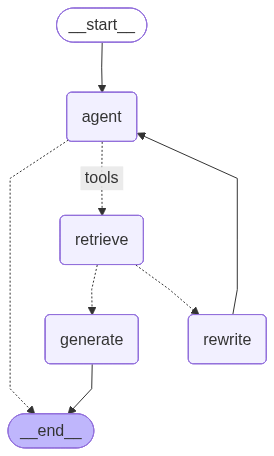

In [86]:
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

##### Graph Invocation

In [87]:
graph.invoke({"messages":"chat history? "})

---CALL AGENT---


{'messages': [HumanMessage(content='chat history? ', additional_kwargs={}, response_metadata={}, id='7f175772-29fe-4fa7-9cb3-936d624b0f18'),
  AIMessage(content="I don't have access to chat history information.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 773, 'total_tokens': 783, 'completion_time': 0.025637849, 'prompt_time': 0.024692991, 'queue_time': 0.216916564, 'total_time': 0.05033084}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_79da0e0073', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--e5ff452f-4e14-4cf5-9e49-cb20dc420962-0', usage_metadata={'input_tokens': 773, 'output_tokens': 10, 'total_tokens': 783})]}

In [88]:
graph.invoke({"messages":"What is sql agent"})

---CALL AGENT---
--CHECK RELEVANCE--
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is sql agent', additional_kwargs={}, response_metadata={}, id='4e19c87d-31f7-46e1-9cb4-a05b21d54236'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'h5e9vw9ce', 'function': {'arguments': '{"query":"sql agent"}', 'name': 'langchain_agents'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 773, 'total_tokens': 804, 'completion_time': 0.074769733, 'prompt_time': 0.022093399, 'queue_time': 0.08984856, 'total_time': 0.096863132}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_37da608fc1', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--15addf73-182d-453c-9019-7d2b359a99d9-0', tool_calls=[{'name': 'langchain_agents', 'args': {'query': 'sql agent'}, 'id': 'h5e9vw9ce', 'type': 'tool_call'}], usage_metadata={'input_tokens': 773, 'output_tokens': 31, 'total_tokens': 804}),
  Tool

In [90]:
graph.invoke({"messages":" sql"})

---CALL AGENT---
--CHECK RELEVANCE--
---DECISION: DOCS NOT RELEVANT---
---TRANSFORM QUERY---
---CALL AGENT---


{'messages': [HumanMessage(content=' sql', additional_kwargs={}, response_metadata={}, id='6f32ea53-a6aa-4970-b661-fc35dc56d4cb'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ch2y62qs9', 'function': {'arguments': '{"query":"sql"}', 'name': 'langchain_agents'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 770, 'total_tokens': 800, 'completion_time': 0.068065911, 'prompt_time': 0.021911097, 'queue_time': 0.087408066, 'total_time': 0.089977008}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_79da0e0073', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--b756337f-e59d-4919-89ea-114bf99f301a-0', tool_calls=[{'name': 'langchain_agents', 'args': {'query': 'sql'}, 'id': 'ch2y62qs9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 770, 'output_tokens': 30, 'total_tokens': 800}),
  ToolMessage(content='Album, 